In [33]:
from dotenv import load_dotenv
import os
from PIL import Image
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.sql import text
import pandas as pd

load_dotenv()

PROJECT_DIR = os.getenv("PROJECT_DIR")
DEAL_ANNOTATION_PATH = os.path.join(PROJECT_DIR, "labeled_deals_gabriel.csv")
LEAFLET_DIR = os.path.join(PROJECT_DIR, "crawled_leaflets")
DABASE_PATH = os.path.join(LEAFLET_DIR, "supermarket_leaflets.db")
DEALS_DIR = os.path.join(PROJECT_DIR, "deals")

In [34]:
deal_annotation_df = pd.read_csv(DEAL_ANNOTATION_PATH, sep=", ")
annotated_images = deal_annotation_df["img_name"].tolist()
all_deal_images = {}
# with os.walk
for root, dirs, files in os.walk(DEALS_DIR):
    for file in files:
        if file in annotated_images:
            all_deal_images[file] = os.path.join(root, file)

C:\Users\gabri\AppData\Local\Temp\ipykernel_17296\1125177506.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  deal_annotation_df = pd.read_csv(DEAL_ANNOTATION_PATH, sep=", ")


In [35]:
deal_annotation_df

,img_name,Marke,Produktname,Original Preis,Reduzierter Preis,Gewicht
0,budni_2449109_1_1655.png,RITTER SPORT,Nussklasse,2.19,0.99,100 g
1,budni_2449109_1_1657.png,Dallmayr,Prodomo Kaffee,7.49,5.69,500 g
2,budni_2449109_1_1659.png,Yogi,Tea,3.29,1.99,32.3 g
3,budni_2449109_1_1661.png,Palmolive,Duschgel,1.69,0.99,250 ml
4,budni_2449109_2_1668.png,M. Asam,Magic Finish Make Up,26.99,18.99,30 ml
...,...,...,...,...,...,...
243,lidl_2638436_56_33392.png,Iglo,Rahm-Spinat,3.29,1.79,750 g
244,lidl_2638436_42_33315.png,esmara,Jeans,NaN,"9.99,",None
245,lidl_2638436_36_33280.png,CRIVIT,Funktions-Jacke,NaN,"14.99,",None
246,lidl_2638436_23_33246.png,LIVARNO home,Glasschüssel-Set 5-teilig,NaN,"12.99,",None


Showing image getraenkeland_2440650_2_299.png
Marke: Desperados
Produktname: Original
Original Preis: 2.29
Deal Preis: 1.99
Gewicht: 0.5 l


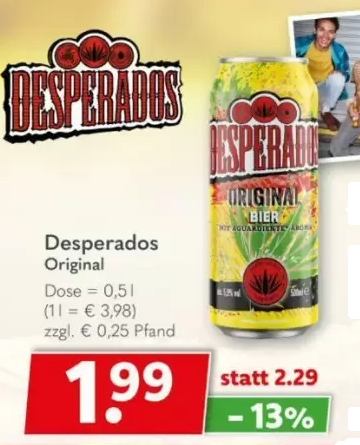

In [36]:
# load random deal image and show it + annotation

# load image
rnd_deal = deal_annotation_df.sample(1).to_dict(orient="records")[0]
img_path = all_deal_images[rnd_deal["img_name"]]
marke = rnd_deal["Marke"]
produktname = rnd_deal["Produktname"]
original_preis = rnd_deal["Original Preis"]
deal_preis = rnd_deal["Reduzierter Preis"]
gewicht = rnd_deal["Gewicht"]
img = Image.open(img_path)
print(f"Showing image {rnd_deal['img_name']}\nMarke: {marke}\nProduktname: {produktname}\nOriginal Preis: {original_preis}\nDeal Preis: {deal_preis}\nGewicht: {gewicht}")
img